<a href="https://colab.research.google.com/github/BobbyTaylorSmith/Financial-Analysis-Python/blob/main/Using_RSI_and_Python_to_Determine_if_Bitcoin_is_Oversold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#This program determines if BTC is over bought or over sold 

In [16]:
#Import the dependecies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [18]:
#Load the data 
from google.colab import files 
files.upload()

Saving BTC-USD.csv to BTC-USD (2).csv


{'BTC-USD.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2020-02-08,9793.070313,9876.749023,9678.910156,9865.119141,9865.119141,35172043762\n2020-02-09,9863.894531,10129.435547,9850.392578,10116.673828,10116.673828,35807884663\n2020-02-10,10115.559570,10165.765625,9784.563477,9856.611328,9856.611328,39386548075\n2020-02-11,9855.891602,10210.052734,9729.334961,10208.236328,10208.236328,37648059389\n2020-02-12,10202.387695,10393.611328,10202.387695,10326.054688,10326.054688,43444303830\n2020-02-13,10323.960938,10457.626953,10116.161133,10214.379883,10214.379883,49356071373\n2020-02-14,10211.550781,10321.996094,10125.534180,10312.116211,10312.116211,43338264162\n2020-02-15,10313.856445,10341.555664,9874.427734,9889.424805,9889.424805,43865054831\n2020-02-16,9889.179688,10053.968750,9722.386719,9934.433594,9934.433594,43374780305\n2020-02-17,9936.560547,9938.815430,9507.637695,9690.142578,9690.142578,45998298413\n2020-02-18,9691.230469,10161.935547,9632.382813,10141.996094,10141.996094

In [19]:
#Store the data 
df = pd.read_csv('BTC-USD.csv')

#Set teh data as the index 
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#Show the data 
df


,Date,Open,High,Low,Close,Adj Close,Volume
2021-02-08,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
2021-02-09,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886
2021-02-10,2021-02-10,46469.761719,47145.566406,43881.152344,44918.183594,44918.183594,87301089896
2021-02-11,2021-02-11,44898.710938,48463.468750,44187.761719,47909.332031,47909.332031,81388911810
2021-02-12,2021-02-12,47877.035156,48745.734375,46424.976563,47504.851563,47504.851563,76555041196
...,...,...,...,...,...,...,...
2022-02-04,2022-02-04,37149.265625,41527.785156,37093.628906,41500.875000,41500.875000,29412210792
2022-02-05,2022-02-05,41501.480469,41847.164063,41038.097656,41441.164063,41441.164063,19652846215
2022-02-06,2022-02-06,41441.121094,42500.785156,41244.906250,42412.433594,42412.433594,16142097334
2022-02-07,2022-02-07,42406.781250,44401.863281,41748.156250,43840.285156,43840.285156,28641855926


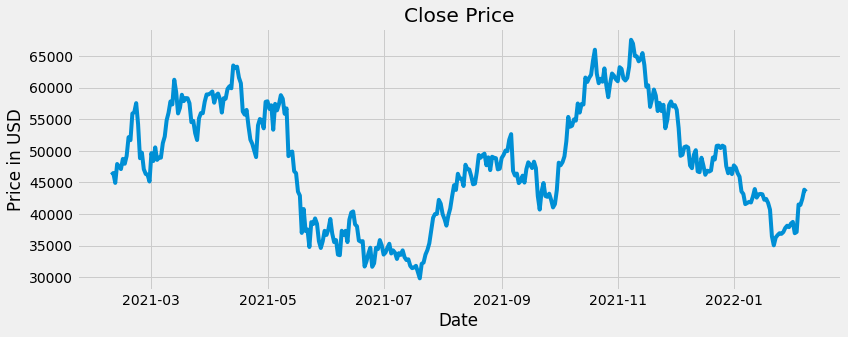

In [20]:
#Create and plot the grapgh 

plt.figure(figsize = (12.2,4.5))
plt.plot(df.index, df['Close'], label = 'Close')
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

In [21]:
#Calculate the RSI 
delta = df['Close'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()
up[up < 0 ] = 0 
down [ down > 0 ] = 0
time_period = 14 
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs( down.rolling(window=time_period).mean() )
RS = AVG_Gain / AVG_Loss 
RSI = 100.0 - (100.0/ (1.0 + RS))


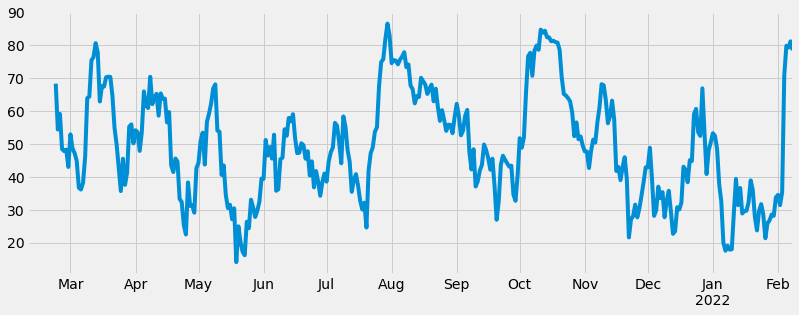

In [22]:
#Plot the RSI 
plt.figure(figsize=(12.2, 4.5)) 
RSI.plot()
plt.show()

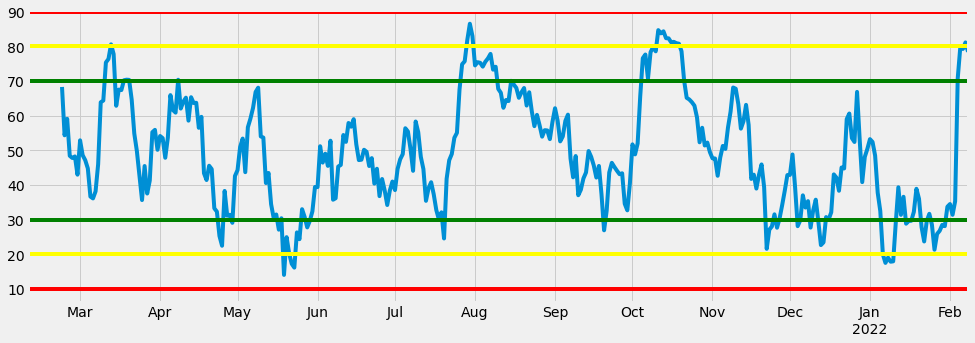

In [25]:
#Plot the RSI with over bought and over sold RSI lines/levels 
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax0=RSI.plot(ax=ax)
ax0.axhline(30, color='green')
ax0.axhline(70, color='green')
ax0.axhline(20, color='yellow')
ax0.axhline(80, color='yellow')
ax0.axhline(10, color='red')
ax0.axhline(90, color='red')